## Updates from meeting with Maria 20190124

## Focal metric: % momentum - when coin A goes from 10,000:btc to 20,000:btc, does coin B go from 1:btc to 2:btc? 

## Question 1: When does a given altcoin diverge in its steady-state relationship to bitcoin? Under what market regimes? The regime definition is for EC; the dates and nature of divergence pin-pointing is for me. [That code is done, but revisit with recalculated monthly and weekly ROCs.]

## Question 2: Given that most altcoins have a steady-state value ratio to bitcoin, which altcoins share their divergence dates from that steady state? Which altcoins covary in altcoin:btc ratio? [That code is done, but output not well visualized/summarized.]

## Question 3: Under what market regimes do these divergences happen? Once again, pin-pointing the dates and nature of divergences is for me.

## Question 4: During what periods of time are altcoin clusters themselves disrupted? What do those cluster disruptions look like - cluster dissolution, cluster fragmentation, even cluster tightening? 

## First import the cleaned coins generated in R dplyr & CryptoDRGDataClean notebook
## Then go in and generate monthly and weekly ROC values, but this time as an average of the daily ROCs within those spans

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

os.listdir('/home/cynthiaorourke/Documents/Data')

['wine_data.csv',
 'WeekEight2015_18.csv',
 'Crunchbase_Startup_Investment_Data.csv',
 'coins23.csv',
 'headsupwinedata.zip',
 'coins.csv',
 'monthly_coins.csv',
 'weekly_coins.csv',
 'xmr.csv',
 'crypto-markets (1).csv',
 'cleaned_coins.csv',
 'Final2015_18.csv',
 'btc.csv',
 'full_coins.csv']

In [23]:
coins = pd.read_csv('/home/cynthiaorourke/Documents/Data/cleaned_coins.csv', header = 0)
coins['date_as_date'] =  pd.to_datetime(coins['date'], format='%Y-%m-%d')
print(coins.dtypes) #check to make sure date_as_date came through
print(coins.iloc[0:2,:])

Unnamed: 0                  int64
slug                       object
symbol                     object
name                       object
date                       object
ranknow                     int64
open                      float64
high                      float64
low                       float64
close                     float64
volume                      int64
market                      int64
close_ratio               float64
spread                    float64
bitcoin_open              float64
coin_to_bitcoin           float64
open_to_open              float64
date_as_date       datetime64[ns]
dtype: object
   Unnamed: 0     slug symbol     name        date  ranknow    open    high  \
0           0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98   
1           1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49   

     low   close  volume      market  close_ratio  spread  bitcoin_open  \
0  132.1  134.21       0  1488566728     0.543814    3.88    

In [24]:
#need to drop that extra index column that was created during dplyr munging
coins.drop(coins.columns[0], axis=1, inplace=True)
print('now without that extra index')
print(coins.iloc[0:2,:])

now without that extra index
      slug symbol     name        date  ranknow    open    high    low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.1   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.0   

    close  volume      market  close_ratio  spread  bitcoin_open  \
0  134.21       0  1488566728     0.543814    3.88        135.30   
1  144.54       0  1603768865     0.781319   13.49        134.44   

   coin_to_bitcoin  open_to_open date_as_date  
0              1.0           0.0   2013-04-28  
1              1.0           0.0   2013-04-29  


In [25]:
#define a new column - classic financial "ROC" - the percent rate of change over time
#it's the proportion change version of open_to_open:
#if a coin worth $10,000 moves to $20,000 and a coin worth $1 moves to $2 in one day, they have = ROCs for that day
#[price] ROC = (new_coin_value - prev_coin_value)/(prev_coin_value)
#where value is ratio_to_bitcoin
#there are other financial ways to define ROC, but from what I've seen they're all versions of this that differ...
#... by orders of magnitude only
coins['ROC']=(coins['coin_to_bitcoin']-coins['coin_to_bitcoin'].shift(1))/coins['coin_to_bitcoin'].shift(1)
print(coins.iloc[0:5,[1,2,15]]) #good - zero for bitcoin itself, as it should be
print(coins.iloc[2090:2096,[1,2,15]]) #correct border issues - first measure is based on last measure of prev altcoin
print(coins.iloc[-158:-150,[1,2,15]])

  symbol     name  open_to_open
0    BTC  Bitcoin  0.000000e+00
1    BTC  Bitcoin  0.000000e+00
2    BTC  Bitcoin  0.000000e+00
3    BTC  Bitcoin  0.000000e+00
4    BTC  Bitcoin -1.110223e-16
     symbol     name  open_to_open
2090    BTC  Bitcoin  0.000000e+00
2091    BTC  Bitcoin -1.110223e-16
2092    BTC  Bitcoin  1.110223e-16
2093    XRP      XRP  0.000000e+00
2094    XRP      XRP -8.100092e-08
2095    XRP      XRP -3.068044e-06
        symbol   name  open_to_open
1026822    MRQ   MIRQ -1.136075e-10
1026823    MRQ   MIRQ -1.439060e-10
1026824    MRQ   MIRQ  1.410765e-10
1026825    MRQ   MIRQ           NaN
1026826  TWIST  TWIST  0.000000e+00
1026827  TWIST  TWIST  1.220749e-08
1026828  TWIST  TWIST -2.825223e-08
1026829  TWIST  TWIST  9.903697e-08


In [26]:
#cleaning up the borders
#this takes a while to run:
for i in coins.index:
    if coins.iloc[i,0]!=coins.iloc[i-1,0]:
        coins.loc[coins.index==i,'open_to_open'] = 0
        coins.loc[coins.index==i,'ROC'] = 0
print(coins.iloc[2090:2096,[1,2,15]]) 
print(coins.iloc[-158:-150,[1,2,15]])
#correct border issues - first measure is based on last measure of prev altcoin

     symbol     name  open_to_open
2090    BTC  Bitcoin  0.000000e+00
2091    BTC  Bitcoin -1.110223e-16
2092    BTC  Bitcoin  1.110223e-16
2093    XRP      XRP  0.000000e+00
2094    XRP      XRP -8.100092e-08
2095    XRP      XRP -3.068044e-06
        symbol   name  open_to_open
1026822    MRQ   MIRQ -1.136075e-10
1026823    MRQ   MIRQ -1.439060e-10
1026824    MRQ   MIRQ  1.410765e-10
1026825    MRQ   MIRQ           NaN
1026826  TWIST  TWIST  0.000000e+00
1026827  TWIST  TWIST  1.220749e-08
1026828  TWIST  TWIST -2.825223e-08
1026829  TWIST  TWIST  9.903697e-08


In [27]:
print(coins.iloc[0:4,[1,2,15]]) #good - zero for bitcoin itself, as it should be
print(coins.iloc[2090:2096,[1,2,15]]) 
print(coins.iloc[-157:-151,[1,2,15]])
#ok, that problem is fixed

  symbol     name  open_to_open
0    BTC  Bitcoin           0.0
1    BTC  Bitcoin           0.0
2    BTC  Bitcoin           0.0
     symbol     name  open_to_open
2090    BTC  Bitcoin  0.000000e+00
2091    BTC  Bitcoin -1.110223e-16
2092    BTC  Bitcoin  1.110223e-16
2093    XRP      XRP  0.000000e+00
2094    XRP      XRP -8.100092e-08
2095    XRP      XRP -3.068044e-06
        symbol   name  open_to_open
1026823    MRQ   MIRQ -1.439060e-10
1026824    MRQ   MIRQ  1.410765e-10
1026825    MRQ   MIRQ           NaN
1026826  TWIST  TWIST  0.000000e+00
1026827  TWIST  TWIST  1.220749e-08
1026828  TWIST  TWIST -2.825223e-08


In [40]:
#adding weekly and monthly ROC values:

coins['weekly_ROC']=coins['ROC'].rolling(7,min_periods=7).mean()#remember that win_options allow for differential weighting...
coins['monthly_ROC']=coins['ROC'].rolling(28,min_periods=28).mean()#... across averaged span of time

print(coins.iloc[0:4,[1,2,15,16,17,18,19]]) #good - zero for bitcoin itself, as it should be
print(coins.iloc[2090:2096,[1,2,15,16,17,18,19]]) 
print(coins.iloc[-157:-151,[1,2,15,16,17,18,19]])
#correct border issues? NaNs may throw errors later, probably better to have ROC set to 0 for beginning...
#... week and month of each coin's weekly_ROC and monthly_ROC
#or is it? wouldn't be hard to replace NaN values with zeroes, but let's not for now
#might be better to leave those coins out of weekly/monthly analyses until they age into them

  symbol     name  open_to_open date_as_date  ROC  weekly_ROC  monthly_ROC
0    BTC  Bitcoin           0.0   2013-04-28  0.0         NaN          NaN
1    BTC  Bitcoin           0.0   2013-04-29  0.0         NaN          NaN
2    BTC  Bitcoin           0.0   2013-04-30  0.0         NaN          NaN
3    BTC  Bitcoin           0.0   2013-05-01  0.0         NaN          NaN
     symbol     name  open_to_open date_as_date  ROC  weekly_ROC  monthly_ROC
2090    BTC  Bitcoin  0.000000e+00   2019-01-17  0.0         0.0          0.0
2091    BTC  Bitcoin -1.110223e-16   2019-01-18  0.0         0.0          0.0
2092    BTC  Bitcoin  1.110223e-16   2019-01-19  0.0         0.0          0.0
2093    XRP      XRP  0.000000e+00   2013-08-04  0.0         0.0          0.0
2094    XRP      XRP  0.000000e+00   2013-08-05  0.0         0.0          0.0
2095    XRP      XRP  0.000000e+00   2013-08-06  0.0         0.0          0.0
        symbol   name  open_to_open date_as_date       ROC  weekly_ROC  \
10268

In [43]:
#remember, never use group in Python, Python takes that way too seriously
coins['month_start'] = coins['date_as_date'].dt.is_month_start
coins['week_start'] = coins['date_as_date'].dt.dayofweek
# now I have a boolean column with "true" only where the date is the start of the month
# and a column describing weekday (so set == 1 or whatever constant)

#generate a df of only monthly samples, but this time drawing from averages of daily ROCs
monthly_coins = coins[(coins['month_start']==True)]
#do the same for weekly samples:
weekly_coins = coins[(coins['week_start']==1)]

print(coins.shape)
print(weekly_coins.shape)
print(monthly_coins.shape) #niiiice

(1026980, 22)
(146272, 22)
(33465, 22)


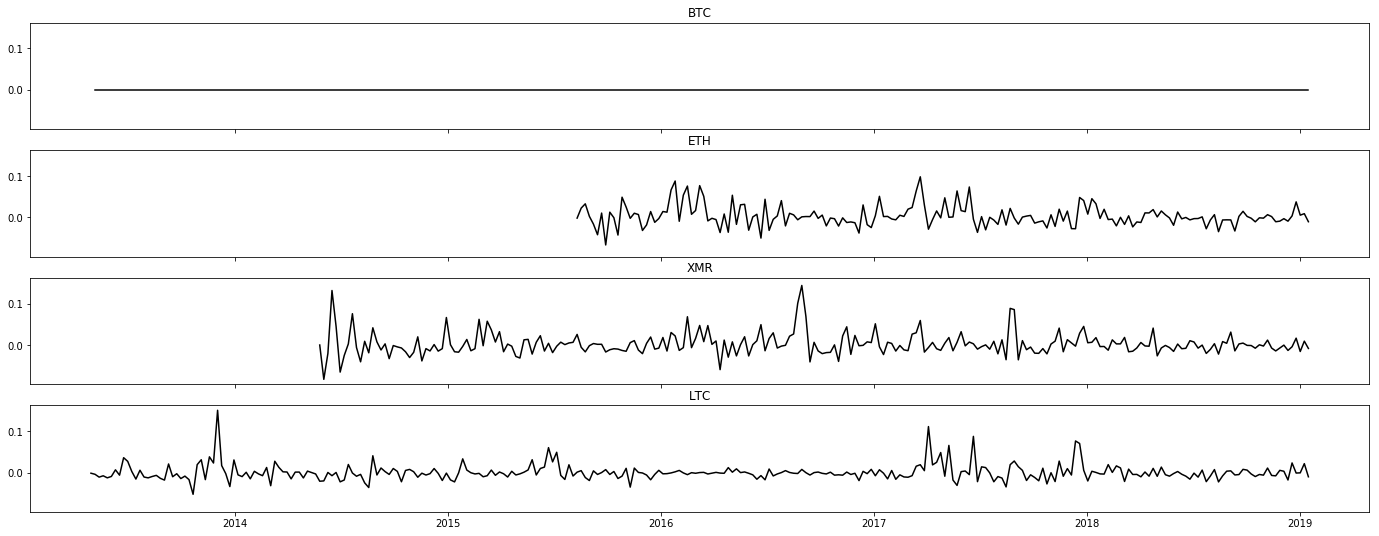

In [44]:
#let's look at this new weekly ROC:
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

a = 'BTC'#should be flat
b = 'ETH'#shouldn't hover around zero
c = 'XMR'#shouldn't hover around zero
d = 'LTC'

x1=weekly_coins['date_as_date'][(weekly_coins['symbol'] == a)]
y1=weekly_coins['weekly_ROC'][(weekly_coins['symbol'] == a)]

x2=weekly_coins['date_as_date'][(weekly_coins['symbol'] == b)]
y2=weekly_coins['weekly_ROC'][(weekly_coins['symbol'] == b)]

x3=weekly_coins['date_as_date'][(weekly_coins['symbol'] == c)]
y3=weekly_coins['weekly_ROC'][(weekly_coins['symbol'] == c)]

x4=weekly_coins['date_as_date'][(weekly_coins['symbol'] == d)]
y4=weekly_coins['weekly_ROC'][(weekly_coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True, sharey=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.show()

#very nice - much less noisy than daily; retains same general look as previously weekly sampled plots...
#... but is just different enough that I know these measures have changed by the new averaging approach

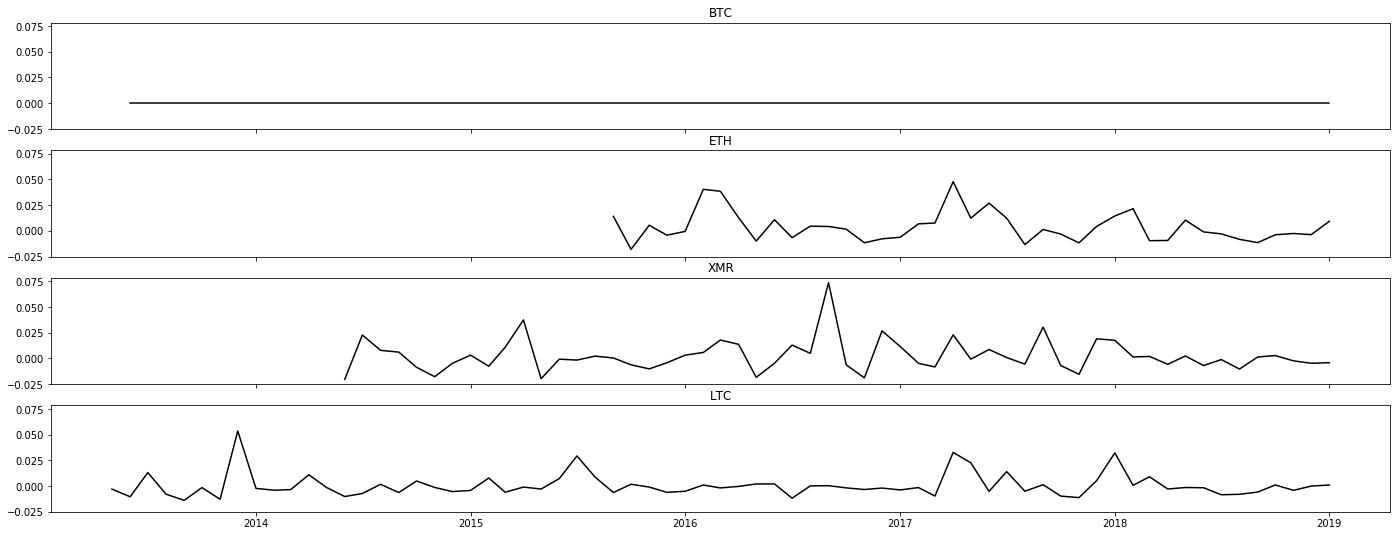

In [45]:
#now monthly:
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

a = 'BTC'#should be flat
b = 'ETH'#shouldn't hover around zero
c = 'XMR'#shouldn't hover around zero
d = 'LTC'

x1=monthly_coins['date_as_date'][(monthly_coins['symbol'] == a)]
y1=monthly_coins['monthly_ROC'][(monthly_coins['symbol'] == a)]

x2=monthly_coins['date_as_date'][(monthly_coins['symbol'] == b)]
y2=monthly_coins['monthly_ROC'][(monthly_coins['symbol'] == b)]

x3=monthly_coins['date_as_date'][(monthly_coins['symbol'] == c)]
y3=monthly_coins['monthly_ROC'][(monthly_coins['symbol'] == c)]

x4=monthly_coins['date_as_date'][(monthly_coins['symbol'] == d)]
y4=monthly_coins['monthly_ROC'][(monthly_coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True, sharey=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.show()

#very nice - again, just enough change and mostly similarity

## Going back to your from-scratch (~) distance matrix that preserves sign

## Just monthly/weekly/daily coinA_ROC-coinB_ROC is probably better, so long as the algorithm can handle negative values

In [52]:
a = 'BTC'#should be flat
b = 'ETH'
c = 'XMR'
d = 'LTC'
subset_coins=monthly_coins[(monthly_coins['symbol'] == b)|(monthly_coins['symbol'] == c)|(monthly_coins['symbol'] == d)]

In [53]:
#First proof this hand-built sign-included distance matrix with that subset of coins:
x = subset_coins.monthly_ROC.values
y = subset_coins.monthly_ROC[(monthly_coins['date_as_date']=='2019-01-01')].values
yT=np.reshape(y,(1,3))
print(yT)
print(y) #ok, that worked - yT is a row, not a column
y=np.reshape(y,(3,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained!
print(subtractions,subtractions.shape)

names = [_ for _ in subset_coins.slug[(subset_coins['date_as_date']=='2019-01-01')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

#great! these coins are a lot closer together than they were with the previously monthly_ROC calculation method
#that should mean less noise (fingers crossed)

[[ 0.00932866  0.00106722 -0.00410695]]
[ 0.00932866  0.00106722 -0.00410695]
[[ 0.          0.00826144  0.01343561]
 [-0.00826144  0.          0.00517417]
 [-0.01343561 -0.00517417  0.        ]] (3, 3)
          ethereum  litecoin    monero
ethereum  0.000000  0.008261  0.013436
litecoin -0.008261  0.000000  0.005174
monero   -0.013436 -0.005174  0.000000


In [54]:
#now with the full monthly coins set, snap-shotted as one day (one month) of comparisons:

x = monthly_coins.monthly_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = monthly_coins.monthly_ROC[(monthly_coins['date_as_date']=='2019-01-01')].values
(m,)=y.shape
print(m)
yT=np.reshape(y,(1,m))
y=np.reshape(y,(m,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained! also faster than pdist approach
print(subtractions,subtractions.shape)

names = [_ for _ in monthly_coins.slug[(monthly_coins['date_as_date']=='2019-01-01')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

#not sure that this is the most efficient way to extract each coin's distance from each other coin in the longrun
#but for now it works
#distances are muuuuch closer! :D

2064
[[ 0.         -0.00201706 -0.00932866 ...  0.00641268 -0.07094805
   0.01374671]
 [ 0.00201706  0.         -0.00731159 ...  0.00842975 -0.06893098
   0.01576377]
 [ 0.00932866  0.00731159  0.         ...  0.01574134 -0.06161939
   0.02307536]
 ...
 [-0.00641268 -0.00842975 -0.01574134 ...  0.         -0.07736073
   0.00733402]
 [ 0.07094805  0.06893098  0.06161939 ...  0.07736073  0.
   0.08469475]
 [-0.01374671 -0.01576377 -0.02307536 ... -0.00733402 -0.08469475
   0.        ]] (2064, 2064)
                          bitcoin    ripple  ethereum  bitcoin-cash       eos  \
bitcoin                  0.000000 -0.002017 -0.009329     -0.003595 -0.002376   
ripple                   0.002017  0.000000 -0.007312     -0.001578 -0.000358   
ethereum                 0.009329  0.007312  0.000000      0.005734  0.006953   
bitcoin-cash             0.003595  0.001578 -0.005734      0.000000  0.001219   
eos                      0.002376  0.000358 -0.006953     -0.001219  0.000000   
tether      

In [61]:
#rank the column coins within row by closeness to the row index coin:
pd.set_option('precision',7)

abs_mins=subtraction_matrix.abs()
abs_mins.idxmin(axis=0)#print this to see proof of concept works! each coin is in fact closest to itself
#maybe create a distance-based rank for each row and extract the index based on that?
rank_abs_mins=abs_mins.rank(axis=0,method='dense') #dense is like 'min,'...
#... but hypothetically keeps ranks sequential by i,i+1,i+2, etc.
#later it turns out now to, but there's a workaround down there
print(rank_abs_mins.iloc[0:9,0:9]) #each coin is rank 1 with itself, great
print('.at['',''] method=',rank_abs_mins.at['bitcoin','ethereum'])#ok, that's super handy, filing that trick away

              bitcoin  ripple  ethereum  bitcoin-cash     eos  tether  \
bitcoin           1.0   257.0     791.0         421.0   301.0   372.0   
ripple          251.0     1.0     629.0         195.0    59.0   140.0   
ethereum       1059.0   856.0       1.0         645.0   811.0   705.0   
bitcoin-cash    472.0   210.0     477.0           1.0   163.0    58.0   
eos             312.0    56.0     588.0         143.0     1.0    87.0   
tether          406.0   151.0     524.0          53.0   103.0     1.0   
stellar         976.0  1125.0    1424.0        1238.0  1154.0  1207.0   
litecoin        132.0   137.0     703.0         303.0   174.0   257.0   
tron           1313.0  1220.0     340.0        1069.0  1186.0  1120.0   

              stellar  litecoin    tron  
bitcoin         702.0     132.0   916.0  
ripple          858.0     119.0   768.0  
ethereum       1280.0     961.0   265.0  
bitcoin-cash    972.0     319.0   636.0  
eos             894.0     183.0   732.0  
tether          9

## Cleaned code to extract and find neighbors of any coin over month's ROC:

In [122]:
pd.set_option('precision',15)

target_coin='cardbuyers' #change this to reflect your coin of interest
subsetted_df=rank_abs_mins.loc[target_coin,:]
# print(subsetted_df[0:10])
# print(len(np.unique(subsetted_df)),np.isnan(subsetted_df).sum(),len(subsetted_df))
#^all of that was to fix a length issue arising from the new rolling mean calculation method - it's fixed
for_distances=subtraction_matrix.loc[target_coin,:]

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0] #this double-duties as a sanity check
    if subsetted_df[match]==target_rank:
        print('This is the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
print()   
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest ROC travel buddy or buddies over the last month:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        #print('If the distance is positive,',target_coin,'did better than the closest traveler(s).')
        break
print()  
for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('The next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()       
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('The third next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        #print(for_distances[for_distances == for_distances[match]])
        #print('If the distance is positive,',target_coin,'did better than these other coin(s).')
        break
print()  
for match in range(n):
    strangers = len(np.unique(subsetted_df))
    NaNs = np.isnan(subsetted_df).sum()
    target_rank = np.unique(subsetted_df)[strangers-NaNs-1]
    if subsetted_df[match]==target_rank:
        print('Here are the coins that',target_coin,'is least like:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        break

This is the coin of interest: ['cardbuyers']

This is its closest ROC travel buddy or buddies over the last month: ['supercoin' 'rabbitcoin']

The next closest to cardbuyers : ['bolenum' 'surety' 'ezoow']

The third next closest to cardbuyers : ['tronclassic' 'bitshares-music' 'hondaiscoin']

Here are the coins that cardbuyers is least like: ['bitcoin' 'ripple' 'ethereum' ... 'cryptopiafeeshares' 'mirq' 'twist']


In [123]:
#sanity check time

a = 'cardbuyers'
b = 'supercoin'
c = 'ripple'

proofing_coins=monthly_coins[(monthly_coins['slug'] == a)|(monthly_coins['slug'] == b)|(monthly_coins['slug'] == c)]
print(proofing_coins[(proofing_coins['date_as_date'] == '2019-01-01')])

             slug symbol        name        date  ranknow      open      high  \
133        ripple    XRP         XRP  2019-01-01        2  0.352512  0.364771   
24629   supercoin  SUPER   SuperCoin  2019-01-01     1486  0.011898  0.011980   
32079  cardbuyers  BCARD  CARDbuyers  2019-01-01     1997  0.000836  0.001012   

            low     close     volume     ...      spread  \
133    0.350402  0.364771  449347622     ...        0.01   
24629  0.004029  0.004239        121     ...        0.01   
32079  0.000834  0.000948         16     ...        0.00   

               bitcoin_open    coin_to_bitcoin       open_to_open  \
133    3746.710000000000036  0.000094085744560 -0.000001871419429   
24629  3746.710000000000036  0.000003175586047  0.000001283084677   
32079  3746.710000000000036  0.000000223129092 -0.000000008843268   

       date_as_date                ROC         weekly_ROC        monthly_ROC  \
133      2019-01-01 -0.019502654637826 -0.008551929944423  0.002017064433580 

## The code is working correctly - it's accurately clustering coins by their means over the selected time period of a month - but the wild fluctuations within that month still look very different even between coins that are close traveling partners by this measure

## Going to try to use the weekly ROC data to see if it fares better. Might even go down to daily (or hourly?).

In [125]:
a = 'BTC'#should be flat
b = 'ETH'
c = 'XMR'
d = 'LTC'
subset_coins=weekly_coins[(weekly_coins['symbol'] == b)|(weekly_coins['symbol'] == c)|(weekly_coins['symbol'] == d)]

In [126]:
#again first proof this hand-built sign-included distance matrix with that subset of coins:
x = subset_coins.weekly_ROC.values
y = subset_coins.weekly_ROC[(weekly_coins['date_as_date']=='2019-01-01')].values
yT=np.reshape(y,(1,3))
print(yT)
print(y) #ok, that worked - yT is a row, not a column
y=np.reshape(y,(3,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained!
print(subtractions,subtractions.shape)

names = [_ for _ in subset_coins.slug[(subset_coins['date_as_date']=='2019-01-01')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

#great! these coins are a lot closer together than they were with the previously monthly_ROC calculation method
#that should mean less noise (fingers crossed)

[[ 0.00538523 -0.00049543 -0.01567152]]
[ 0.00538523 -0.00049543 -0.01567152]
[[ 0.          0.00588067  0.02105676]
 [-0.00588067  0.          0.01517609]
 [-0.02105676 -0.01517609  0.        ]] (3, 3)
                   ethereum           litecoin             monero
ethereum  0.000000000000000  0.005880666855857  0.021056756831363
litecoin -0.005880666855857  0.000000000000000  0.015176089975506
monero   -0.021056756831363 -0.015176089975506  0.000000000000000


In [128]:
#now with the full monthly coins set, snap-shotted as one day (one month) of comparisons:

x = weekly_coins.weekly_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = weekly_coins.weekly_ROC[(weekly_coins['date_as_date']=='2019-01-01')].values
(m,)=y.shape
print(m)
yT=np.reshape(y,(1,m))
y=np.reshape(y,(m,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained! also faster than pdist approach
print(subtractions,subtractions.shape)

names = [_ for _ in monthly_coins.slug[(monthly_coins['date_as_date']=='2019-01-01')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

#not sure that this is the most efficient way to extract each coin's distance from each other coin in the longrun
#but for now it works
#distances are muuuuch closer! :D

2064
[[ 0.          0.00855193 -0.00538523 ...  0.028879   -0.08034497
   0.02031265]
 [-0.00855193  0.         -0.01393716 ...  0.02032707 -0.0888969
   0.01176072]
 [ 0.00538523  0.01393716  0.         ...  0.03426424 -0.07495974
   0.02569788]
 ...
 [-0.028879   -0.02032707 -0.03426424 ...  0.         -0.10922398
  -0.00856636]
 [ 0.08034497  0.0888969   0.07495974 ...  0.10922398  0.
   0.10065762]
 [-0.02031265 -0.01176072 -0.02569788 ...  0.00856636 -0.10065762
   0.        ]] (2064, 2064)
                                   bitcoin             ripple  \
bitcoin                  0.000000000000000  0.008551929944423   
ripple                  -0.008551929944423  0.000000000000000   
ethereum                 0.005385233951410  0.013937163895833   
bitcoin-cash            -0.014031588417207 -0.005479658472784   
eos                      0.002146883760706  0.010698813705130   
tether                   0.013333756081581  0.021885686026004   
stellar                 -0.011084684506056 -

In [129]:
#rank the column coins within row by closeness to the row index coin:
pd.set_option('precision',7)

abs_mins=subtraction_matrix.abs()
abs_mins.idxmin(axis=0)#print this to see proof of concept works! each coin is in fact closest to itself
#maybe create a distance-based rank for each row and extract the index based on that?
rank_abs_mins=abs_mins.rank(axis=0,method='dense') #dense is like 'min,'...
#... but hypothetically keeps ranks sequential by i,i+1,i+2, etc.
#later it turns out now to, but there's a workaround down there
print(rank_abs_mins.iloc[0:9,0:9]) #each coin is rank 1 with itself, great
print('.at['',''] method=',rank_abs_mins.at['bitcoin','ethereum'])#ok, that's super handy, filing that trick away

              bitcoin  ripple  ethereum  bitcoin-cash     eos  tether  \
bitcoin           1.0   664.0     312.0         884.0   168.0   567.0   
ripple          635.0     1.0     839.0         376.0   709.0   986.0   
ethereum        445.0   989.0       1.0        1135.0   244.0   318.0   
bitcoin-cash    976.0   408.0    1118.0           1.0  1036.0  1226.0   
eos             204.0   820.0     184.0        1000.0     1.0   453.0   
tether          933.0  1302.0     521.0        1379.0   774.0     1.0   
stellar         771.0   180.0     969.0         212.0   884.0  1099.0   
litecoin         44.0   625.0     346.0         859.0   203.0   598.0   
tron            273.0   425.0     550.0         700.0   403.0   748.0   

              stellar  litecoin    tron  
bitcoin         780.0      44.0   262.0  
ripple          196.0     614.0   474.0  
ethereum       1076.0     477.0   652.0  
bitcoin-cash    229.0     925.0   840.0  
eos             926.0     258.0   432.0  
tether         13

In [130]:
pd.set_option('precision',15)

target_coin='cardbuyers' #change this to reflect your coin of interest
subsetted_df=rank_abs_mins.loc[target_coin,:]
# print(subsetted_df[0:10])
# print(len(np.unique(subsetted_df)),np.isnan(subsetted_df).sum(),len(subsetted_df))
#^all of that was to fix a length issue arising from the new rolling mean calculation method - it's fixed
for_distances=subtraction_matrix.loc[target_coin,:]

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0] #this double-duties as a sanity check
    if subsetted_df[match]==target_rank:
        print('This is the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
print()   
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest ROC travel buddy or buddies over the last month:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        #print('If the distance is positive,',target_coin,'did better than the closest traveler(s).')
        break
print()  
for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('The next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()       
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('The third next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        #print(for_distances[for_distances == for_distances[match]])
        #print('If the distance is positive,',target_coin,'did better than these other coin(s).')
        break
print()  
for match in range(n):
    strangers = len(np.unique(subsetted_df))
    NaNs = np.isnan(subsetted_df).sum()
    target_rank = np.unique(subsetted_df)[strangers-NaNs-1]
    if subsetted_df[match]==target_rank:
        print('Here are the coins that',target_coin,'is least like:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        break

This is the coin of interest: ['cardbuyers']

This is its closest ROC travel buddy or buddies over the last month: ['bulwark' 'experty' 'bobs-repair']

The next closest to cardbuyers : ['blocknet']

The third next closest to cardbuyers : ['swarm-city' 'opal']

Here are the coins that cardbuyers is least like: ['opus' 'bitspace']


## Whoa! Look at how different the monthly and weekly ROC values are in the sanity check below! Yeah, gonna need to choose window of averaging very carefully and with explicit assumptions. 

## Weekly looks soooo much better than monthly pairings, but weighting by closeness to sample date is still worth considering - might better capture, for example, the closeness of two coins that had an early-week spike as opposed to a third that had a late-week spike

## Daily sampling would also capture this, however, and more precisely - but would be more computationally intense to draw comparisons from - a much taller stack of subtraction matrices to work with

In [133]:
#sanity check time

a = 'cardbuyers'
b = 'bulwark'
c = 'experty'

proofing_coins=weekly_coins[(weekly_coins['slug'] == a)|(weekly_coins['slug'] == b)|(weekly_coins['slug'] == c)]
print(proofing_coins[(proofing_coins['date_as_date'] == '2019-01-01')])

#omg yes - at least with focal set to "cardbuyers," this is an insanely big improvement
#cardbuyers tracks its closest partners - bulwark and experty - very closely
#looks nothing like the most distant pair, opus and bitspace

              slug symbol        name        date  ranknow      open  \
41729      bulwark    BWK     Bulwark  2019-01-01      538  0.191563   
52077      experty    EXY     Experty  2019-01-01      705  0.038041   
140216  cardbuyers  BCARD  CARDbuyers  2019-01-01     1997  0.000836   

            high       low     close  volume     ...      spread  \
41729   0.192332  0.180314  0.187591    6081     ...        0.01   
52077   0.040682  0.038030  0.040587   18383     ...        0.00   
140216  0.001012  0.000834  0.000948      16     ...        0.00   

                bitcoin_open    coin_to_bitcoin       open_to_open  \
41729   3746.710000000000036  0.000051128323249 -0.000000040589869   
52077   3746.710000000000036  0.000010153174385 -0.000000231532507   
140216  3746.710000000000036  0.000000223129092 -0.000000008843268   

        date_as_date                ROC         weekly_ROC        monthly_ROC  \
41729     2019-01-01 -0.000793252509860 -0.027123641702227 -0.02061016842117

## At the end of the day, take a moment to export your data to .csv to avoid too much munging tomorrow and to recover rapidly from kernel meltdowns:

In [47]:
coins.to_csv('/home/cynthiaorourke/Documents/Data/coins.csv', sep=',', encoding='utf-8')
weekly_coins.to_csv('/home/cynthiaorourke/Documents/Data/weekly_coins.csv', sep=',', encoding='utf-8')
monthly_coins.to_csv('/home/cynthiaorourke/Documents/Data/monthly_coins.csv', sep=',', encoding='utf-8')

In [48]:
#when pulling data back out, re-import modules and follow-up with this:
coins = pd.read_csv('/home/cynthiaorourke/Documents/Data/coins.csv', header = 0)
coins.drop(coins.columns[0], axis=1, inplace=True)
coins['date_as_date'] =  pd.to_datetime(coins['date'], format='%Y-%m-%d')
print(coins.iloc[0:4,:])

weekly_coins = pd.read_csv('/home/cynthiaorourke/Documents/Data/weekly_coins.csv', header = 0)
weekly_coins.drop(weekly_coins.columns[0], axis=1, inplace=True)
weekly_coins['date_as_date'] =  pd.to_datetime(weekly_coins['date'], format='%Y-%m-%d')
print(weekly_coins.iloc[0:4,:])

monthly_coins = pd.read_csv('/home/cynthiaorourke/Documents/Data/monthly_coins.csv', header = 0)
monthly_coins.drop(monthly_coins.columns[0], axis=1, inplace=True)
monthly_coins['date_as_date'] =  pd.to_datetime(monthly_coins['date'], format='%Y-%m-%d')
print(monthly_coins.iloc[0:4,:])

      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   

    close  volume      market  close_ratio  spread  bitcoin_open  \
0  134.21       0  1488566728     0.543814    3.88        135.30   
1  144.54       0  1603768865     0.781319   13.49        134.44   
2  139.00       0  1542813125     0.384317   12.88        144.00   
3  116.99       0  1298954594     0.288157   32.17        139.00   

   coin_to_bitcoin  open_to_open date_as_date  ROC  weekly_ROC  monthly_ROC  
0              1.0           0.0   2013-04-28  0.0         NaN          NaN  
1              1.0           0.0   2013-04-29  0.0         NaN          NaN  
2              1.0           0.0   2013-04-30  0.